<a href="https://colab.research.google.com/github/cysorianoc/justlearn/blob/main/toy_notebook_fr_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# À propos du calcul de $\pi$

## En demandant à la lib maths

Mon ordinateur m'indique que $\pi$ vaut _approximativement_

In [1]:
from math import *
print(pi)

3.141592653589793


## En utilisant la méthode des aiguilles de Buffon

Mais calculé avec la __méthode__ des [aiguilles de Buffon](https://fr.wikipedia.org/wiki/Aiguille_de_Buffon), on obtiendrait comme __approximation__:

In [2]:
import numpy as np
np.random.seed(seed=42)
N=10000
x=np.random.uniform(size=N, low=0, high=1)
theta = np.random.uniform(size=N, low=0, high=pi/2)
2/(sum((x+np.sin(theta))>1)/N)

3.128911138923655

## Avec un argument ''fréquentiel'' de surface

Sinon, une méthode plus simple à comprendre et ne faisant pas intervenir d'appel à la fonction sinus se base sur le fait que si $X \sim U(0,1)$ et $Y \sim U(0,1)$ alors $P[X^2+Y^2\leq 1]=\pi/4$ (voir [méthode de Monte Carlo sur Wikipedia](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo#D%C3%A9termination_de_la_valeur_de_%CF%80). Le code suivant illustre ce fait:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
np.random.seed(seed=42)
N = 1000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)
accept = (x*x+y*y) <= 1
reject = np.logical_not(accept)

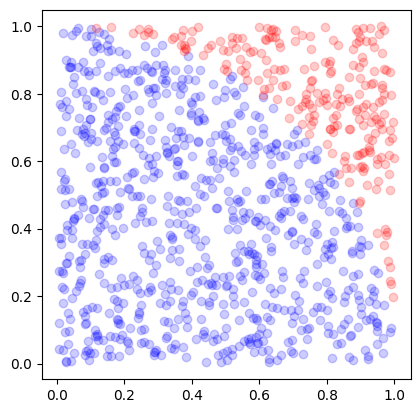

In [5]:
fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha=0.2, edgecolor=None)
ax.scatter(x[reject], y[reject], c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')

Il est alors aise d'obtenir une approximation (pas terrible) de $\pi()$ en comptant combien de fois, en moyene, $X^2+y^2$ est inférieur à 1:

In [6]:
4*np.mean(accept)

3.112